In [1]:
!pip install py-feat

  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.1
    Uninstalling scipy-1.7.1:
      Successfully uninstalled scipy-1.7.1
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2
  Attempting uninstall: networkx
    Found existing installation: networkx 2.6.3
    Uninstalling networkx-2.6.3:
      Successfully uninstalled networkx-2.6.3
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.18.3
    Uninstalling scikit-image-0.18.3:
      Successfully uninstalled scikit-image-0.18.3


In [1]:
from tqdm import tqdm

In [2]:
#setting up the detector
from feat import Detector

detector = Detector()
detector

feat.detector.Detector(face_model=retinaface, landmark_model=mobilefacenet, au_model=xgb, emotion_model=resmasknet, facepose_model=img2pose)

In [13]:
test_video_path = "C:\\Work\\606Capstone\\Video_chunks\\Video_chunks\\trial_lie_001_000.mp4"
video_prediction = detector.detect_video(test_video_path, skip_frames=24)
video_prediction.head()

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:27<00:00,  4.58s/it]


,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,x_4,...,AU43,anger,disgust,fear,happiness,sadness,surprise,neutral,input,frame
frame,,,,,,,,,,,,,,,,,,,,,
0,407.422024,112.832275,98.081231,125.438125,0.989365,412.103813,411.727582,413.331898,417.740588,423.143773,...,0.201936,0.008858,0.000931,0.004510,0.846660,0.024106,0.105119,0.009816,C:\Work\606Capstone\Video_chunks\Video_chunks\...,0
24,406.772099,117.377222,94.385830,133.057894,0.988867,414.756456,413.050454,413.048499,415.830111,419.233753,...,0.369547,0.290158,0.017562,0.030457,0.075366,0.192975,0.256158,0.137324,C:\Work\606Capstone\Video_chunks\Video_chunks\...,24
48,406.853435,116.365819,93.801358,134.381522,0.983064,415.042079,413.527325,413.565464,416.057984,418.863360,...,0.096855,0.082902,0.019993,0.055787,0.099965,0.551988,0.061252,0.128114,C:\Work\606Capstone\Video_chunks\Video_chunks\...,48
72,407.849892,119.791966,96.051776,132.960582,0.987813,417.055838,415.178728,415.232479,418.232477,422.009649,...,0.068277,0.037983,0.001495,0.013236,0.167420,0.269022,0.287200,0.223644,C:\Work\606Capstone\Video_chunks\Video_chunks\...,72
96,406.160106,124.914687,95.842053,129.252791,0.986462,415.824453,414.193605,414.493357,417.748788,421.855521,...,0.042394,0.028074,0.002909,0.014461,0.316547,0.132879,0.390344,0.114786,C:\Work\606Capstone\Video_chunks\Video_chunks\...,96


In [19]:
print(video_prediction[['AU01','AU02','AU04','AU05','AU20','AU26']])

           AU01      AU02      AU04      AU05  AU20      AU26
frame                                                        
0      0.507397  0.419935  0.341971  0.348077   1.0  0.104904
24     0.693429  0.530501  0.323085  0.330703   0.0  0.338827
48     0.686611  0.524882  0.154044  0.510449   0.0  0.229299
72     0.580222  0.456564  0.319264  0.401309   0.0  0.205623
96     0.450085  0.541882  0.179417  0.415573   0.0  0.115832
120    0.549095  0.466452  0.274580  0.420614   0.0  0.152411


[<Figure size 1080x504 with 3 Axes>,
 <Figure size 1080x504 with 3 Axes>,
 <Figure size 1080x504 with 3 Axes>,
 <Figure size 1080x504 with 3 Axes>,
 <Figure size 1080x504 with 3 Axes>,
 <Figure size 1080x504 with 3 Axes>]

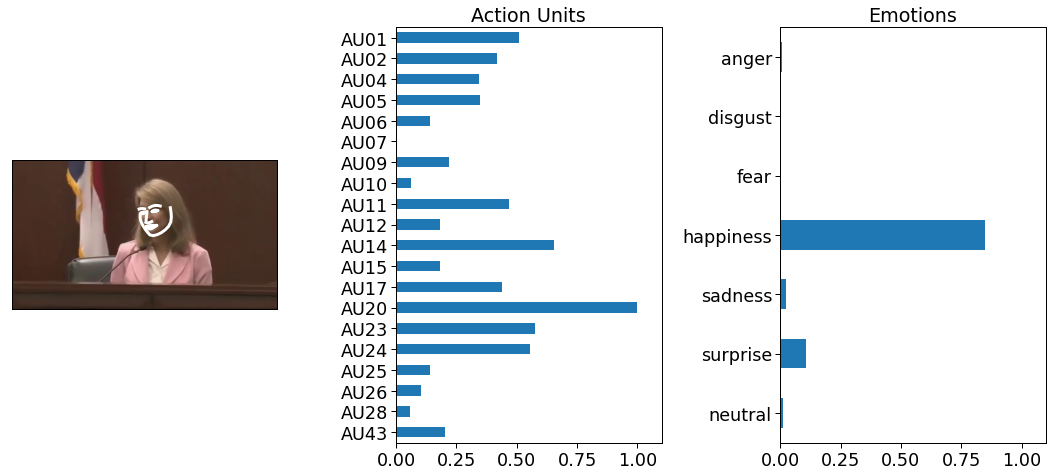

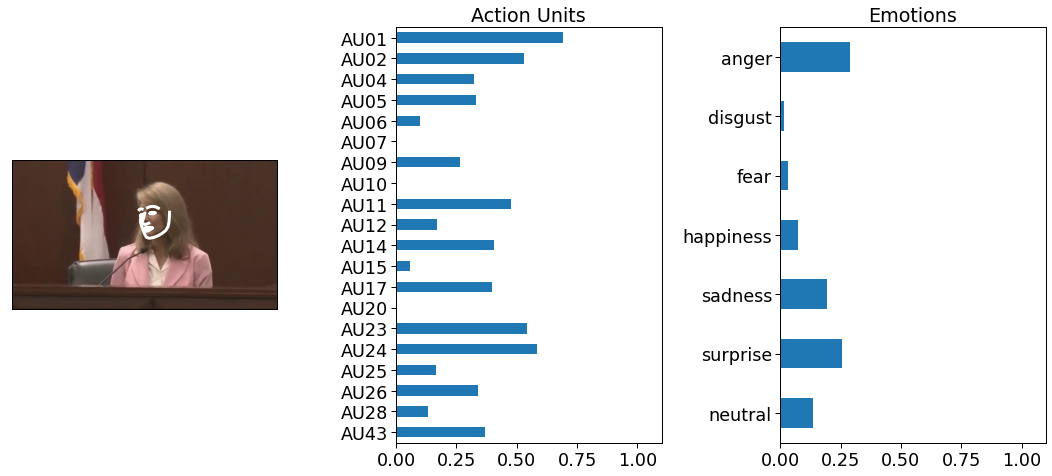

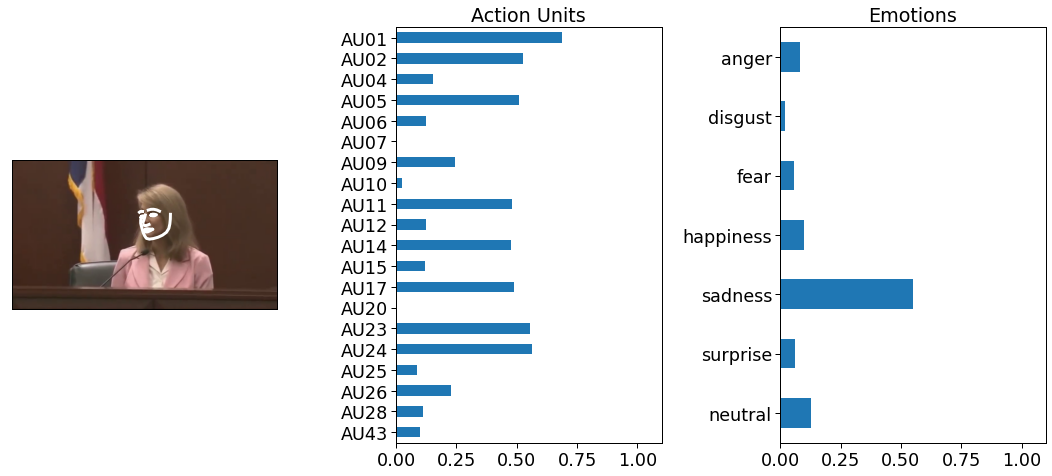

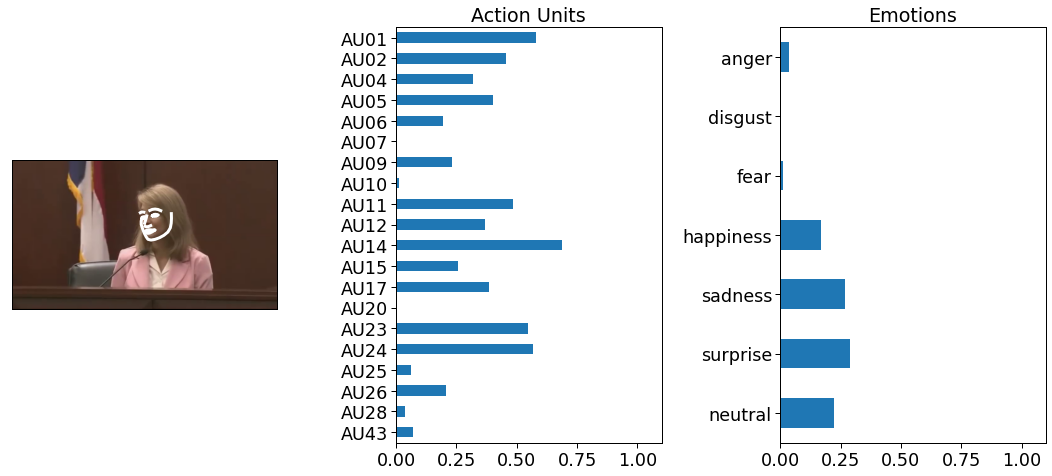

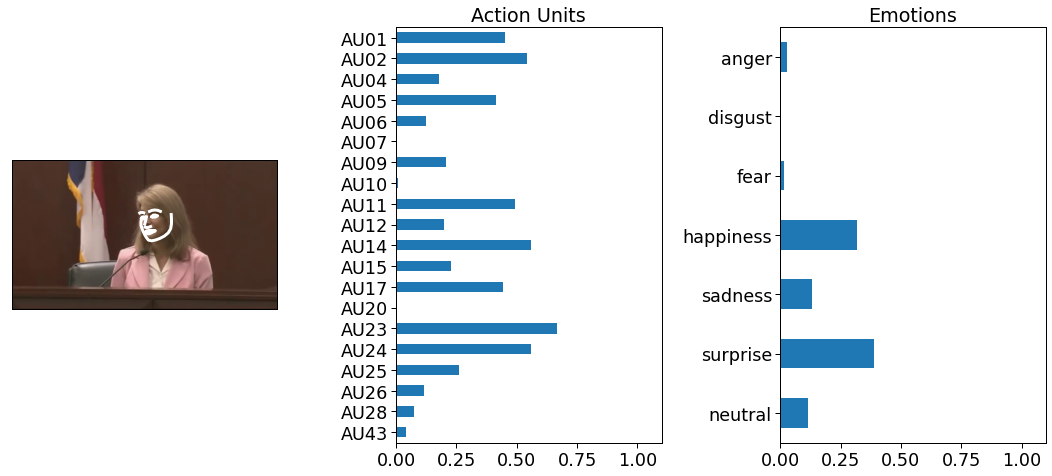

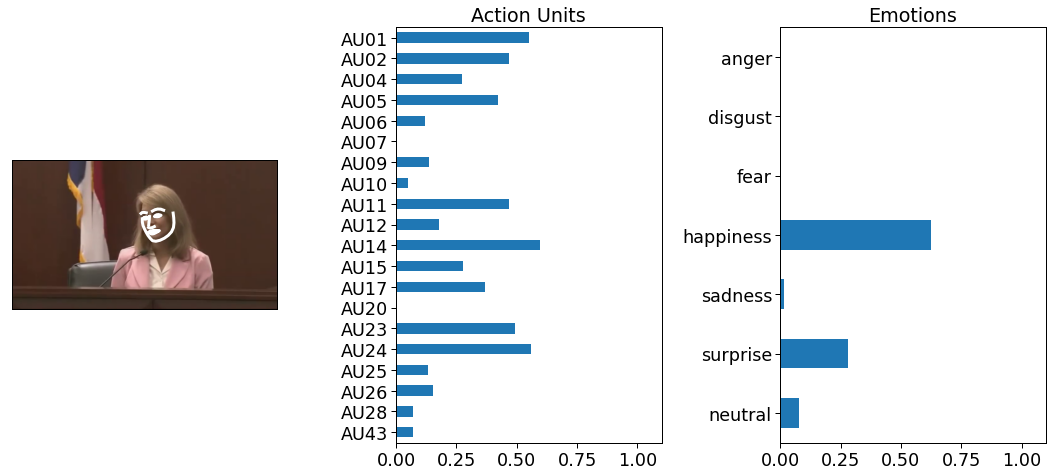

In [15]:
#f = plt.figure(figsize=(5 * 126, 7))
video_prediction.plot_detections(faceboxes=False, add_titles=False)

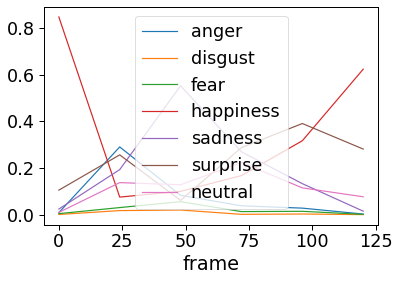

In [16]:
axes = video_prediction.emotions.plot()

In [ ]:
from glob import glob
import pandas as pd
import numpy as np
import os

videos = np.sort(glob("C:\\Work\\606Capstone\\Video_chunks\\Sample\\*.mp4"))
for video in tqdm(videos):
    out_name = video.replace(".mp4", ".csv")
    if not os.path.exists(out_name):

        print(f"Processing: {video}")

        # This is the line that does detection!
        fex = detector.detect_video(video)

        fex.to_csv(out_name, index=False)

  0%|                                                                                           | 0/40 [00:00<?, ?it/s]

Processing: C:\Work\606Capstone\Video_chunks\Sample\trial_lie_001_000.mp4



  2%|██                                                                              | 1/40 [09:21<6:04:42, 561.10s/it]

Processing: C:\Work\606Capstone\Video_chunks\Sample\trial_lie_001_001.mp4



  5%|████                                                                            | 2/40 [18:02<5:40:37, 537.84s/it]

Processing: C:\Work\606Capstone\Video_chunks\Sample\trial_lie_001_002.mp4



  8%|██████                                                                          | 3/40 [26:59<5:31:17, 537.22s/it]

Processing: C:\Work\606Capstone\Video_chunks\Sample\trial_lie_001_003.mp4



 10%|████████                                                                        | 4/40 [36:33<5:31:09, 551.93s/it]

Processing: C:\Work\606Capstone\Video_chunks\Sample\trial_lie_002_000.mp4



 12%|██████████                                                                      | 5/40 [46:16<5:28:26, 563.04s/it]

Processing: C:\Work\606Capstone\Video_chunks\Sample\trial_lie_002_001.mp4



 15%|████████████                                                                    | 6/40 [55:17<5:14:52, 555.67s/it]

Processing: C:\Work\606Capstone\Video_chunks\Sample\trial_lie_002_002.mp4



 18%|█████████████▋                                                                | 7/40 [1:04:20<5:03:15, 551.38s/it]

Processing: C:\Work\606Capstone\Video_chunks\Sample\trial_lie_002_003.mp4



 20%|███████████████▌                                                              | 8/40 [1:14:06<5:00:00, 562.51s/it]

Processing: C:\Work\606Capstone\Video_chunks\Sample\trial_lie_002_004.mp4



 22%|█████████████████▌                                                            | 9/40 [1:23:13<4:48:08, 557.68s/it]

Processing: C:\Work\606Capstone\Video_chunks\Sample\trial_lie_002_005.mp4



 25%|███████████████████▎                                                         | 10/40 [1:32:27<4:38:16, 556.56s/it]

Processing: C:\Work\606Capstone\Video_chunks\Sample\trial_lie_002_006.mp4



 28%|█████████████████████▏                                                       | 11/40 [1:40:57<4:22:01, 542.12s/it]

Processing: C:\Work\606Capstone\Video_chunks\Sample\trial_lie_002_007.mp4



 30%|███████████████████████                                                      | 12/40 [1:45:18<3:33:10, 456.82s/it]

Processing: C:\Work\606Capstone\Video_chunks\Sample\trial_lie_002_008.mp4



 32%|█████████████████████████                                                    | 13/40 [1:49:46<2:59:45, 399.47s/it]

Processing: C:\Work\606Capstone\Video_chunks\Sample\trial_lie_002_009.mp4



 35%|██████████████████████████▉                                                  | 14/40 [1:54:46<2:40:09, 369.59s/it]

Processing: C:\Work\606Capstone\Video_chunks\Sample\trial_lie_002_010.mp4



 38%|████████████████████████████▉                                                | 15/40 [1:59:36<2:23:55, 345.40s/it]

Processing: C:\Work\606Capstone\Video_chunks\Sample\trial_lie_002_011.mp4



 40%|██████████████████████████████▊                                              | 16/40 [2:04:31<2:12:04, 330.17s/it]

Processing: C:\Work\606Capstone\Video_chunks\Sample\trial_lie_002_012.mp4



 42%|████████████████████████████████▋                                            | 17/40 [2:09:49<2:05:12, 326.65s/it]

Processing: C:\Work\606Capstone\Video_chunks\Sample\trial_lie_002_013.mp4



 45%|██████████████████████████████████▋                                          | 18/40 [2:14:46<1:56:28, 317.64s/it]

Processing: C:\Work\606Capstone\Video_chunks\Sample\trial_lie_002_014.mp4



 48%|████████████████████████████████████▌                                        | 19/40 [2:19:42<1:48:53, 311.12s/it]

Processing: C:\Work\606Capstone\Video_chunks\Sample\trial_lie_003_000.mp4



 50%|██████████████████████████████████████▌                                      | 20/40 [2:25:00<1:44:26, 313.31s/it]

Processing: C:\Work\606Capstone\Video_chunks\Sample\trial_lie_004_000.mp4



 52%|████████████████████████████████████████▍                                    | 21/40 [2:30:19<1:39:44, 315.00s/it]

Processing: C:\Work\606Capstone\Video_chunks\Sample\trial_lie_004_001.mp4



 98%|██████████████████████████████████████████████████████████████████████████████▋ | 115/117 [04:50<00:04,  2.49s/it]

In [24]:
#Aggregate detections using a Fex dataframe
from feat.utils.io import read_feat

fex = pd.concat(map(lambda video: read_feat(video.replace(".mp4", ".csv")), videos))

print(f"Unique videos: {fex.inputs.nunique()}")
print(f"Total processed frames: {fex.shape[0]}")
print(f"Avg frames per video: {fex.groupby('input').size().mean()}")

Unique videos: 12
Total processed frames: 61
Avg frames per video: 5.083333333333333


In [25]:
fex.shape
fex.head()

,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,x_4,...,AU43,anger,disgust,fear,happiness,sadness,surprise,neutral,input,frame
0,407.422024,112.832275,98.081231,125.438125,0.989365,412.103813,411.727582,413.331898,417.740588,423.143773,...,0.201936,0.008858,0.000931,0.004510,0.846660,0.024106,0.105119,0.009816,C:\Work\606Capstone\Video_chunks\Sample\trial_...,0
1,406.772099,117.377222,94.385830,133.057894,0.988867,414.756456,413.050454,413.048499,415.830111,419.233753,...,0.369547,0.290158,0.017562,0.030457,0.075366,0.192975,0.256158,0.137324,C:\Work\606Capstone\Video_chunks\Sample\trial_...,24
2,406.853435,116.365819,93.801358,134.381522,0.983064,415.042079,413.527325,413.565464,416.057984,418.863360,...,0.096855,0.082902,0.019993,0.055787,0.099965,0.551987,0.061252,0.128114,C:\Work\606Capstone\Video_chunks\Sample\trial_...,48
3,407.849892,119.791966,96.051776,132.960582,0.987813,417.055838,415.178728,415.232479,418.232477,422.009649,...,0.068277,0.037983,0.001495,0.013236,0.167420,0.269022,0.287200,0.223644,C:\Work\606Capstone\Video_chunks\Sample\trial_...,72
4,406.160106,124.914687,95.842053,129.252791,0.986462,415.824453,414.193605,414.493357,417.748788,421.855521,...,0.042394,0.028074,0.002909,0.014461,0.316547,0.132879,0.390344,0.114786,C:\Work\606Capstone\Video_chunks\Sample\trial_...,96


In [27]:
#summarize the data (get mean)
by_video = fex.update_sessions(fex["input"])

# Compute the mean per video
video_means = by_video.extract_mean()

video_means[['mean_AU01','mean_AU02','mean_AU04','mean_AU05','mean_AU06','mean_AU07','mean_AU09','mean_AU10','mean_AU11','mean_AU12','mean_AU14','mean_AU15','mean_AU17','mean_AU20','mean_AU23','mean_AU24','mean_AU25','mean_AU26','mean_AU28','mean_AU43','mean_anger','mean_disgust','mean_fear','mean_happiness','mean_sadness','mean_surprise','mean_neutral']]

,mean_AU01,mean_AU02,mean_AU04,mean_AU05,mean_AU20,mean_AU26
C:\Work\606Capstone\Video_chunks\Sample\trial_lie_001_000.mp4,0.577807,0.490036,0.265394,0.404454,0.166667,0.191149
C:\Work\606Capstone\Video_chunks\Sample\trial_lie_001_001.mp4,0.536129,0.459942,0.375177,0.374907,0.200000,0.180648
C:\Work\606Capstone\Video_chunks\Sample\trial_lie_001_002.mp4,0.548463,0.462335,0.329907,0.371271,0.000000,0.199359
C:\Work\606Capstone\Video_chunks\Sample\trial_lie_001_003.mp4,0.556663,0.501336,0.268491,0.378795,0.000000,0.219744
C:\Work\606Capstone\Video_chunks\Sample\trial_lie_001_004.mp4,0.565254,0.496142,0.223070,0.418433,0.000000,0.151367
C:\Work\606Capstone\Video_chunks\Sample\trial_lie_002_000.mp4,0.429885,0.403161,0.357923,0.337693,0.500000,0.296648
C:\Work\606Capstone\Video_chunks\Sample\trial_lie_002_001.mp4,0.438951,0.435245,0.390507,0.320097,0.400000,0.337107
C:\Work\606Capstone\Video_chunks\Sample\trial_lie_002_002.mp4,0.420811,0.449975,0.363618,0.330555,0.200000,0.224775
C:\Work\606Capstone\Video_chunks\Sample\trial_lie_002_003.mp4,0.344387,0.429268,0.321850,0.327999,0.833333,0.239158
C:\Work\606Capstone\Video_chunks\Sample\trial_lie_002_004.mp4,0.373802,0.397990,0.293807,0.306763,1.000000,0.320250


In [ ]:
df = video_means[['mean_AU01','mean_AU02','mean_AU04','mean_AU05','mean_AU06','mean_AU07','mean_AU09','mean_AU10','mean_AU11','mean_AU12','mean_AU14','mean_AU15','mean_AU17','mean_AU20','mean_AU23','mean_AU24','mean_AU25','mean_AU26','mean_AU28','mean_AU43','mean_anger','mean_disgust','mean_fear','mean_happiness','mean_sadness','mean_surprise','mean_neutral']]
df

<IPython.core.display.Javascript object>

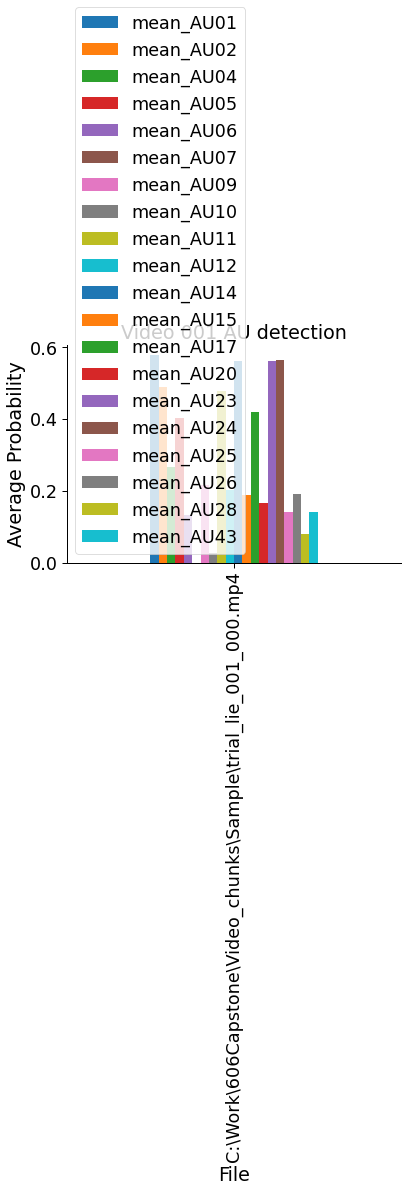

In [33]:
# Grab the aus just for video 1
video001_aus = video_means.aus.iloc[:1]

# Plot them
ax = video001_aus.plot(kind='bar', title='Video 001 AU detection');
ax.set(ylabel='Average Probability', xlabel='File');
sns.despine();